# Python + Google Colab: Algoritmalar ve Veri Yapıları Eğitimi (Sıfırdan İleriye)

# Bölüm 22: Python Programlama Dili Üzerinde Graf Algoritmaları

Github Kaynagı:       
https://github.com/acetinkaya/Python-Google-Colab-Algoritmalar-ve-Veri-Yapilari-Egitimi --> D22

Öğr. Gör. Ali ÇETİNKAYA - 2025

In [4]:
print("Merhaba, Python Veri Yapıları ve Algoritmalar / Bölüm 22")

Merhaba, Python Veri Yapıları ve Algoritmalar / Bölüm 22


In [5]:
import sys  # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [6]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os

os.chdir('/content/drive/My Drive/VERIYAPILARI_PYTHON')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/VERIYAPILARI_PYTHON


# Bölüm 22: Python Programlama Dili Üzerinde Graf Algoritmaları

Graf (Graph) Nedir?

Bir graf, nesneler arasındaki ilişkiyi modelleyen matematiksel bir yapıdır. İki temel bileşeni vardır:

* Düğümler (Vertices / Nodes): Nesnelerin kendisi (örneğin: şehirler, kişiler, cihazlar).

* Kenarlar (Edges): Düğümler arasındaki bağlantılar (örneğin: yollar, arkadaşlıklar, veri akışı).

# Temel Türleri:

| Tür                | Açıklama |
|--------------------|----------|
| **Yönsüz Graf**    | A ile B arasında bağlantı varsa, B ile A da bağlıdır. (örnek: sosyal ağlar) |
| **Yönlü Graf (DiGraph)** | A'dan B'ye bağlantı varsa, ters yön garanti edilmez. (örnek: web sayfası bağlantıları) |
| **Ağırlıklı Graf** | Her kenarın bir maliyeti (mesafe, zaman, hız vb.) vardır. (örnek: navigasyon sistemleri) |

# Graf Kullanım Alanları

| Alan                        | Uygulama Açıklaması |
|-----------------------------|---------------------|
| **Navigasyon Sistemleri**   | Şehirler arası en kısa yolun hesaplanması (Dijkstra, A*) |
| **Web Tarama ve SEO**       | Web sayfaları arası bağlantılar yönlü grafla modellenir (PageRank algoritması) |
| **Sosyal Ağ Analizi**       | Facebook, LinkedIn gibi platformlarda arkadaş önerileri (BFS/DFS, community detection) |
| **Yapay Zeka & Oyunlar**    | Oyun karakterlerinin yol bulması (Pathfinding) |
| **Veritabanı İlişkileri**   | Veri varlıkları ve bağlantıları (ER diagramlar yönlü graflardır) |
| **Ağ Analizi (Network)**    | Router’lar arası veri akışı yönlü ve ağırlıklı graflarla modellenir |
| **Biyoinformatik**          | DNA/Protein dizilim karşılaştırmaları, genetik yollar |
| **Finansal Akışlar**        | Para transfer ağları, dolandırıcılık tespiti (graf üzerinden pattern bulma) |
| **Devre Tasarımı / Elektronik** | Bileşen bağlantıları yönlü ve çevrimli graflarla temsil edilir |
| **Tavsiye Sistemleri**      | Ürünler arası ilişki ağı, kullanıcıların ortak davranış grafı |


Graflarda kullanacağımız yönlendirme oklarını; networkx kütüphanesi ile işleme alıyoruz. Bu kütüphane içindeki: nx.Graph() ile nx.DiGraph() fonksiyonlarını kullanıyoruz. En temel farkları ok kenarların yönlü olup olmamasıdır. Bu fark, graf teorisinde oldukça kritiktir ve uygulama alanını doğrudan etkiler.

* nx.Graph() → Yönsüz (Undirected) Grafik
* nx.DiGraph() → Yönlü (Directed) Grafik

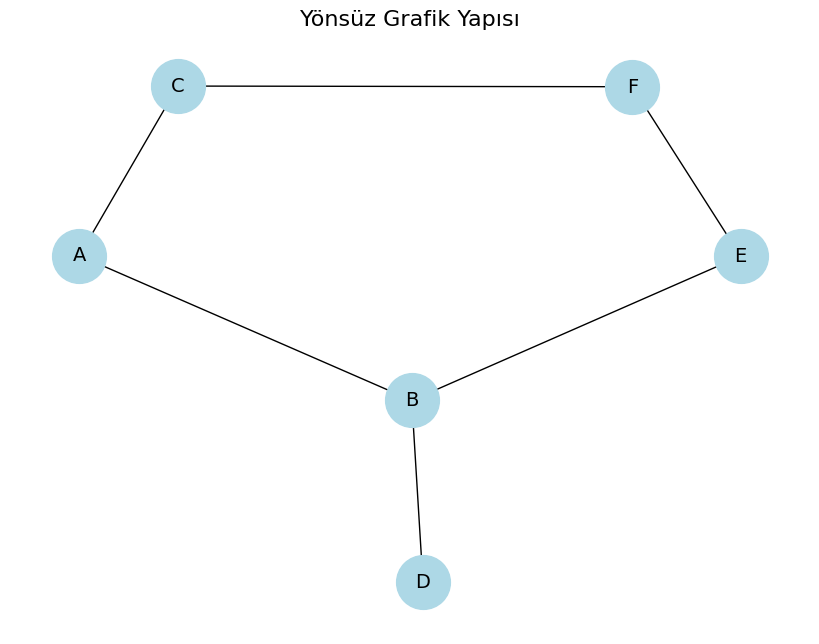

In [2]:
# Yönsüz Grafın Görsel Gösterimi

import networkx as nx               # NetworkX: Grafik yapıları oluşturmak ve analiz etmek için kullanılır
import matplotlib.pyplot as plt     # Matplotlib: Grafiklerin görsel olarak çizimi için kullanılır

# Yönsüz bir grafik (graph) nesnesi tanımlanıyor
G = nx.Graph()

# Graf içerisine düğümler (node) ve kenarlar (edge) ekleniyor
# add_edges_from ile bağlantı kurulan düğümler belirtiliyor
G.add_edges_from([
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('E', 'F')
])

# Grafik çizimi için şekil boyutu ayarlanıyor (8x6 inç)
plt.figure(figsize=(8, 6))

# Graf çizimi
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=14)
# with_labels=True -> Düğümlerin etiketleri (A, B, C...) gösterilecek
# node_color='lightblue' -> Düğümlerin rengi açık mavi
# node_size=1500 -> Düğüm boyutu
# font_size=14 -> Etiket yazı tipi boyutu

# Grafik başlığı ekleniyor
plt.title("Yönsüz Grafik Yapısı", fontsize=16)

# Grafik görselleştiriliyor
plt.show()

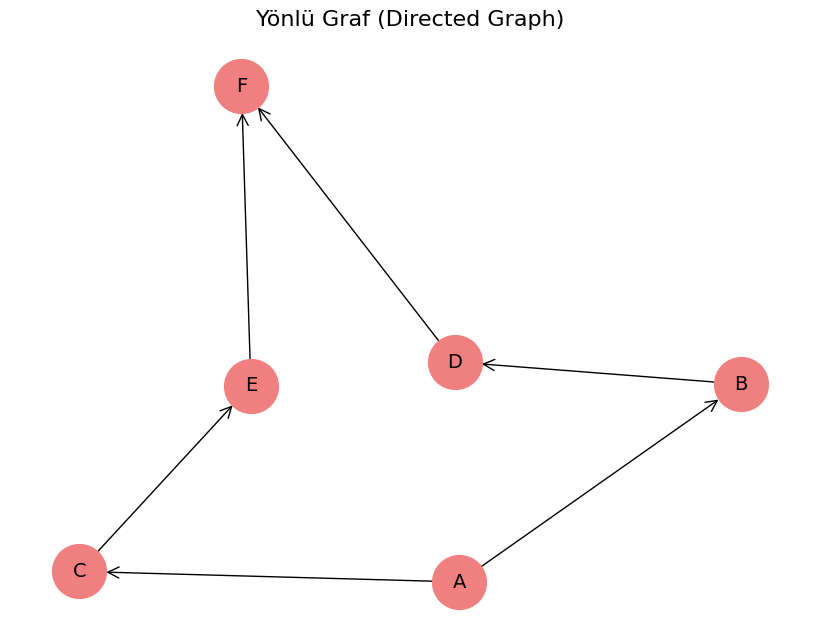

In [3]:
# Yönlü Grafın Görsel Gösterimi

import networkx as nx                 # NetworkX kütüphanesi: grafik oluşturma ve analiz işlemleri için
import matplotlib.pyplot as plt       # Matplotlib kütüphanesi: görsel çizim için

# Yönlü bir grafik (Directed Graph) nesnesi oluşturuluyor
G = nx.DiGraph()  # DiGraph: Directional Graph, yani kenarların yönü önemlidir

# Grafik içerisine yönlü kenarlar ekleniyor
# Örneğin ('A', 'B') ifadesi A → B yönünde bir bağlantıyı ifade eder
G.add_edges_from([
    ('A', 'B'),   # A'dan B'ye ok var
    ('A', 'C'),   # A'dan C'ye ok var
    ('B', 'D'),   # B'den D'ye ok var
    ('C', 'E'),   # C'den E'ye ok var
    ('D', 'F'),   # D'den F'ye ok var
    ('E', 'F')    # E'den F'ye ok var
])

# Grafik çizimi için konumlar belirleniyor (spring layout, yay benzeri yerleşim)
plt.figure(figsize=(8, 6))             # Grafik boyutu
pos = nx.spring_layout(G)             # Düğümlerin konumlarını belirleyen algoritma (estetik görünüm sağlar)

# Grafik çizimi yapılır
nx.draw(
    G, pos,
    with_labels=True,                 # Düğüm isimleri (A, B, C...) yazılsın
    node_size=1500,                   # Düğüm boyutu
    node_color='lightcoral',          # Düğüm rengi
    font_size=14,                     # Yazı tipi boyutu
    arrows=True,                      # Oklar gösterilsin
    arrowstyle='->',                  # Ok stili
    arrowsize=20                      # Ok boyutu
)

# Başlık eklenir
plt.title("Yönlü Graf (Directed Graph)", fontsize=16)

# Grafik gösterilir
plt.show()